In [8]:
import scipy 
import numpy as np
import torch
import matplotlib.pyplot as plt
from pathlib import Path
import os

dpd_baseline_path = Path(r'D:\github_projects\dpd-baselines')
os.chdir(dpd_baseline_path)
signal_path = Path(r'data\BlackBoxData_200.mat')
signal_path
sig = scipy.io.loadmat(signal_path)

In [12]:
fs = 1.2288e6
x = sig['x'][0]
eRef = sig['eRef'][0]
y = sig['y'][0]
sig.keys(), x.shape


(dict_keys(['__header__', '__version__', '__globals__', 'eRef', 'x', 'y']),
 (245760,))

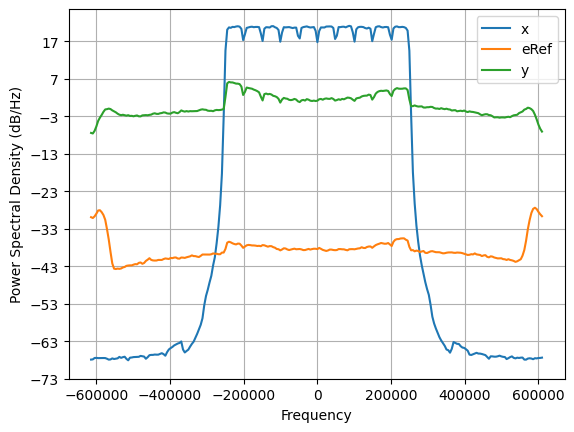

In [13]:
plt.psd(x.flatten(), Fs=fs, label='x');
plt.psd(eRef, Fs=fs, label='eRef');
plt.psd(y, Fs=fs, label='y');
# plt.psd(x - y)
plt.legend()

In [15]:
import numpy as np
from scipy import signal

fc = 0.4e6          
fs = fs                       


tw = 0.05e6         
numtaps = int(np.ceil(4*fs/tw))  
numtaps |= 1        

b = signal.firwin(numtaps, cutoff=fc, fs=fs, window="hann", pass_zero="lowpass")

y_filt = signal.filtfilt(b, [1.0], y)


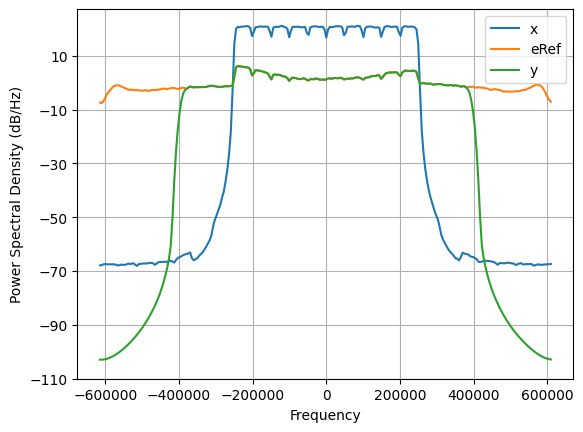

In [16]:
plt.psd(x.flatten(), Fs=fs, label='x');
plt.psd(y, Fs=fs, label='eRef');
plt.psd(y_filt, Fs=fs, label='y');
plt.legend()